In [29]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt
import keras.preprocessing as kp

In [2]:
# resize all images to one size align with VGG16
IMG_SIZE = [224, 224]

In [3]:
# set paths to data
train_path = "../Data/001_chest_X_ray/train/"
valid_path = "../Data/001_chest_X_ray/val/"
test_path = "../Data/001_chest_X_ray/test/"

In [4]:
# add preprocessing layers to the ron of VGG and dont train existing weights
vgg = VGG16(input_shape=IMG_SIZE+[3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob("../Data/001_chest_X_ray/train/*")

In [6]:
folders

['../Data/001_chest_X_ray/train\\NORMAL',
 '../Data/001_chest_X_ray/train\\PNEUMONIA']

In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_dataset = train_datagen.flow_from_directory(train_path,target_size=IMG_SIZE, batch_size=32, class_mode='categorical')
valid_dataset = test_datagen.flow_from_directory(valid_path,target_size=IMG_SIZE, batch_size=32, class_mode='categorical')
test_dataset = test_datagen.flow_from_directory(test_path,target_size=IMG_SIZE, batch_size=32, class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
r = model.fit(
    training_dataset,
    validation_data= test_dataset,
    epochs=5,
    steps_per_epoch=len(training_dataset),
    validation_steps=len(test_dataset)
)

Epoch 1/5
163/163 [==============================] - 96s 544ms/step - loss: 0.2076 - accuracy: 0.9164 - val_loss: 0.3215 - val_accuracy: 0.8926
Epoch 2/5
163/163 [==============================] - 64s 389ms/step - loss: 0.1051 - accuracy: 0.9597 - val_loss: 0.2336 - val_accuracy: 0.9215
Epoch 3/5
163/163 [==============================] - 61s 376ms/step - loss: 0.0917 - accuracy: 0.9668 - val_loss: 0.2573 - val_accuracy: 0.9231
Epoch 4/5
163/163 [==============================] - 62s 382ms/step - loss: 0.0723 - accuracy: 0.9728 - val_loss: 0.2339 - val_accuracy: 0.9183
Epoch 5/5
163/163 [==============================] - 63s 385ms/step - loss: 0.0965 - accuracy: 0.9643 - val_loss: 0.3813 - val_accuracy: 0.8990


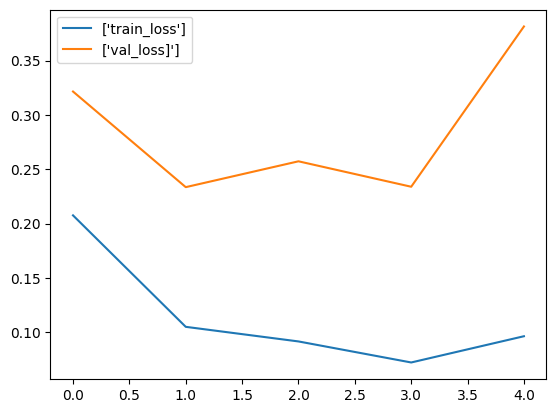

In [16]:
plt.plot(r.history['loss'], label=['train_loss'])
plt.plot(r.history['val_loss'], label=['val_loss]'])
plt.legend()
plt.show()

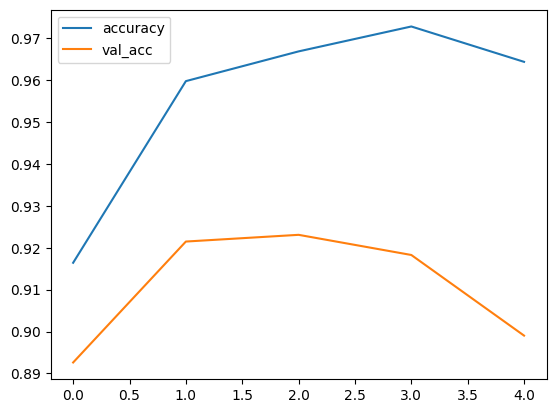

In [21]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [23]:
model.save('model_vgg16.h5')

In [25]:
model = load_model('model_vgg16.h5')

In [32]:
import tensorflow as tf
import numpy as np

In [37]:
img = tf.keras.utils.load_img('../Data/001_chest_X_ray/val/PNEUMONIA/person1950_bacteria_4881.jpeg', target_size=IMG_SIZE)
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes = model.predict(img_data)
classes

1/1 [==============================] - 0s 20ms/step


array([[0., 1.]], dtype=float32)

1/1 [==============================] - 6s 6s/step


array([[1.000000e+00, 1.353134e-19]], dtype=float32)